**Business goal**

We need a model to predict the shared bikes demand with the available independent variables (features). It will be used by the company or management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and reach the customer's expectations. 

#**Load the Shared Bike data set**

In [1]:
from google.colab import files
upload = files.upload()

Saving day.csv to day (1).csv


In [2]:
import pandas as pd 
bike = pd.read_csv("day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Understaning data**

In [4]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Useful insights from data:**

*   Data have 730 rows and 16 columns.

*  Except One column all are either integer or float


***From data dictionary we understood that:***

1.  *instant* column is a just index numbers, couldn't get the any information from this column. So, we can be removed *instant* column.
2.   *dteday* is date column, but in the data have month and year  separate columns. We can drop *dteday* column it not bringing any new information.
3. In addition of casual and registered columns contains the count of bike booked by different categories of customers, and we will not going to get much information from these columns, thus we wil drop these two as well.

**TARGET variable/column is 'cnt'**

#**Data visualization**

In [8]:
# Drop columns
bike.drop(["instant", "dteday", "casual", "registered"], axis = 1, inplace = True)

In [9]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
# For better undestanding and visibility of few columns[Renamed]
bike.rename(columns={'season':'Season','yr':'Year','mnth':'Month',
                     'weathersit':'Weather','hum':'Humidity','cnt':'Count'}, inplace=True)

In [11]:
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Above, all the columns shows numerical type, but from the data dictionary we see that there are some columns which represents categorical data.

**Binary Types :** Year, holiday, workingday

**Categorical Types:** Season, Month, weekday, Weather

**Numeric types:** temp, atemp, Humidity, windspeed, Count

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Mapping weather names for better visibilty
# Season (1:spring, 2:summer, 3:fall, 4:winter)
bike['Season'] = bike['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})


In [13]:
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


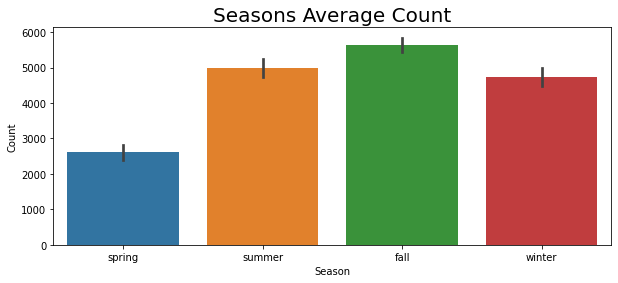

In [14]:
# Visualising Seasons count of rented bikes

plt.figure(figsize=[10,4])
sns.barplot(bike['Season'],bike['Count'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

**Observations:**

*   In fall, there seems to be highest demand of rented the bikes, followed by Summer and Winter.
*   Spring seems to be the least season where people rent bikes. 

In [15]:
# Mapping Year varible proper names for better visibilty

bike['Year'] = bike['Year'].map({0:'2018',1:'2019'})
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


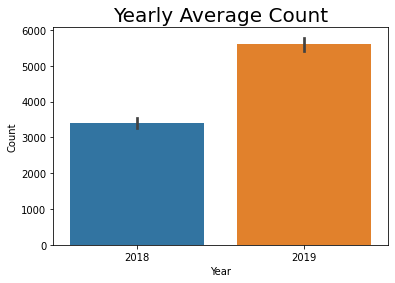

In [16]:
# Visualising Yearly count of rented bikes

sns.barplot(bike['Year'],bike['Count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

Average rented bikes has increased in 2019 nearly 40% more than that of 2018.

In [17]:
# Mapping Month varible proper names for better visibilty

bike['Month'] = bike['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,2018,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


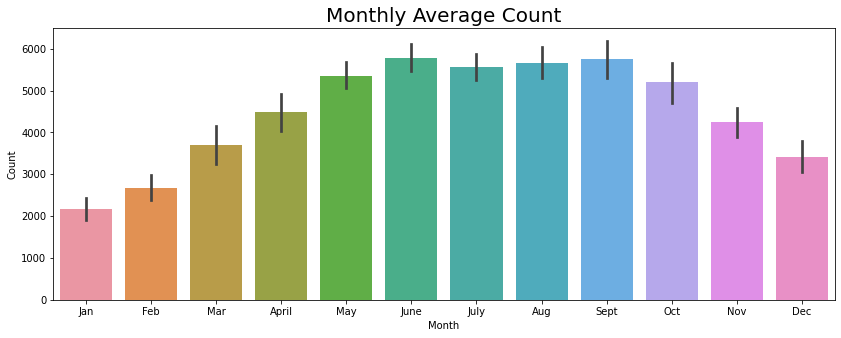

In [18]:
# Visualising Monthly count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(bike['Month'],bike['Count'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

Almost similar average count of rented bikes in June, September,  August, July followed by May, October.

Finally, December, January, February have the least demand probably due to winter season.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


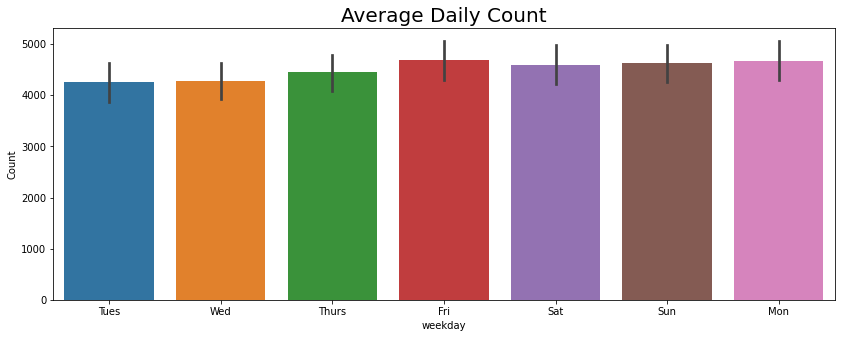

In [19]:
# Mapping weekday variable proper names for better visibilty

bike['weekday'] = bike['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

# Visualising Daily count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(bike['weekday'],bike['Count'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()

It looks like all days have similar demands, but still Friday, Saturday Sunday, Monday has high demands compare to other days.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


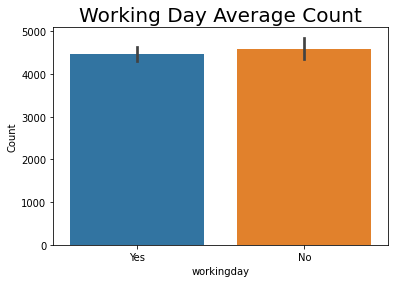

In [20]:
# Mapping workingday varible proper names for better visibilty

bike['workingday'] = bike['workingday'].map({0:'No',1:'Yes'})

# Visualising Working day count of rented bikes

sns.barplot(bike['workingday'],bike['Count'])

plt.title('Working Day Average Count', fontsize = 20)
plt.show()

Similar demands either working or not working days.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


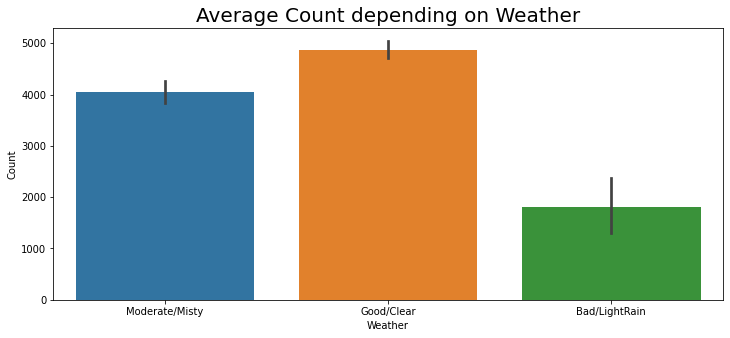

In [21]:
# Mapping Weather varible proper names for better visibilty

# Weather situation : 
# 1: Clear, Few clouds, Partly cloudy   = Good/Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain


bike['Weather'] = bike['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})


# Visualising Daily count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(bike['Weather'],bike['Count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

**Observations:**

It shows that if the weather is clear, the demand is more.

If the weather is bad, demand decreases drastically.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


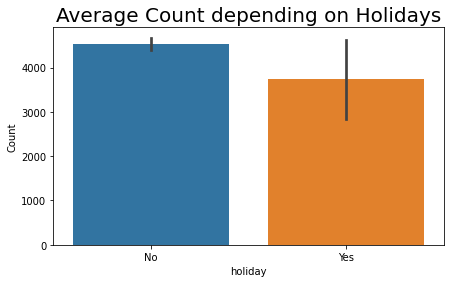

In [22]:
# Mapping Holiday varible proper names for better visibilty

bike['holiday'] = bike['holiday'].map({0:'No',1:'Yes'})

# Visualising Holiday wise count of rented bikes

plt.figure(figsize=[7,4])
sns.barplot(bike['holiday'],bike['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

Decrease of demand if it is a holiday.

In [23]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    object 
 2   Month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   Weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


Numerical columns visulization(Scatter plot)

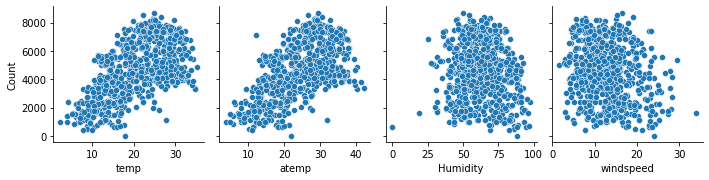

In [24]:
sns.pairplot(data = bike, x_vars = ['temp','atemp','Humidity','windspeed'] , y_vars = ['Count'])

The above graphs shows that linear relation ship exist between temp, atemp and count.

**Auto Exploratory Data Analysis(EDA)**

In [25]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [26]:
# Pandas profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(bike)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#**Data preprocessing**

In [27]:
for col in bike:
    print(bike[col].value_counts(ascending=False), '\n\n\n')

fall      188
summer    184
spring    180
winter    178
Name: Season, dtype: int64 



2018    365
2019    365
Name: Year, dtype: int64 



Jan      62
Mar      62
May      62
July     62
Aug      62
Oct      62
Dec      62
April    60
June     60
Sept     60
Nov      60
Feb      56
Name: Month, dtype: int64 



No     709
Yes     21
Name: holiday, dtype: int64 



Tues     105
Wed      105
Thurs    104
Fri      104
Sat      104
Sun      104
Mon      104
Name: weekday, dtype: int64 



Yes    504
No     226
Name: workingday, dtype: int64 



Good/Clear        463
Moderate/Misty    246
Bad/LightRain      21
Name: Weather, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.1743

No unknown values in the data set.

In [28]:
# checking duplicates
bike.duplicated().sum()

0

No duplicates

In [29]:
# Checking missing and null values
bike.isna().sum()  # or
bike.isnull().sum()

Season        0
Year          0
Month         0
holiday       0
weekday       0
workingday    0
Weather       0
temp          0
atemp         0
Humidity      0
windspeed     0
Count         0
dtype: int64

No null/NaN values.

In [30]:
## Distibution plots
def draw_plots(data, var, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, f in enumerate(var):
        ax=fig.add_subplot(rows,cols,i+1)
        data[f].hist(bins=20,ax=ax, facecolor='midnightblue')
        ax.set_title(f+'Distribution',color='DarkRed')
 
    fig.tight_layout() 

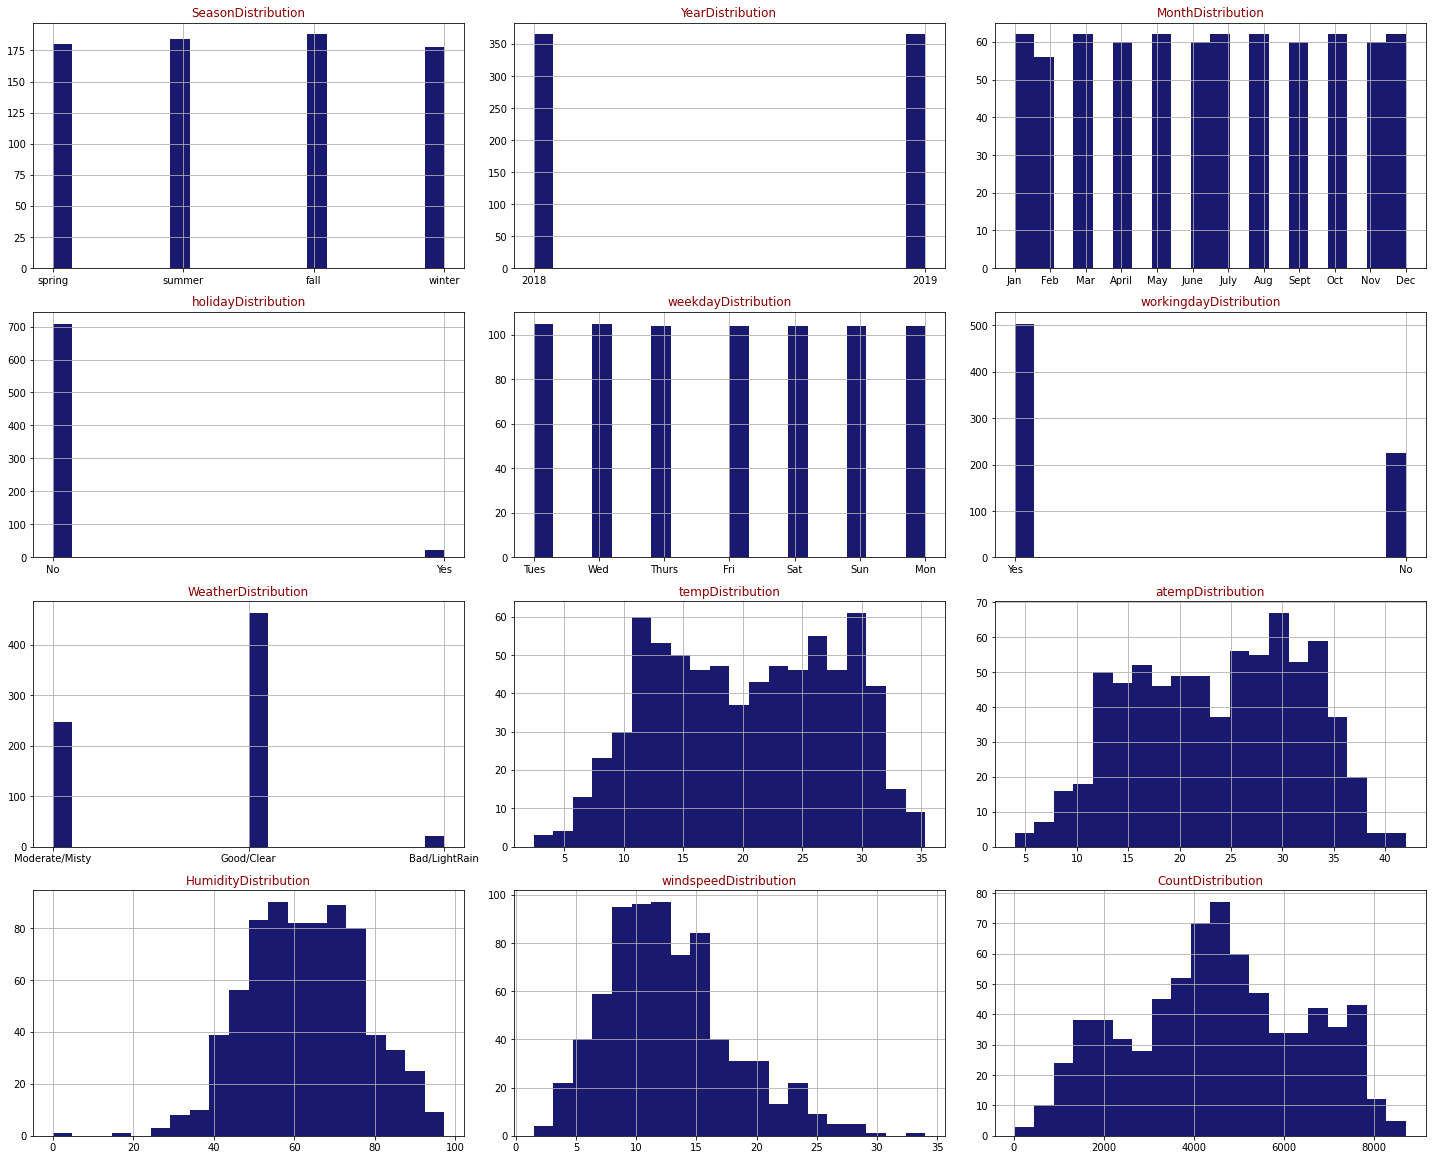

In [31]:
plt.show()
draw_plots(bike,bike.columns,5,3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


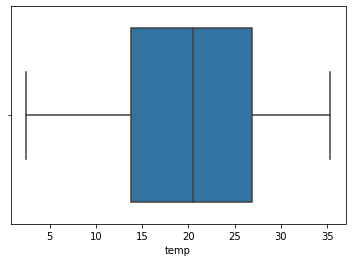

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


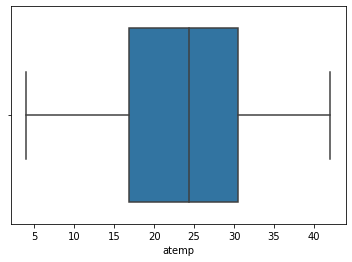

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


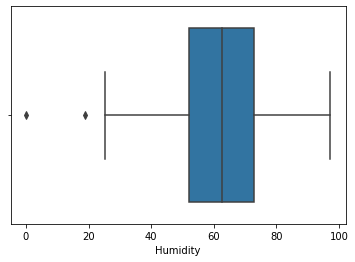

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


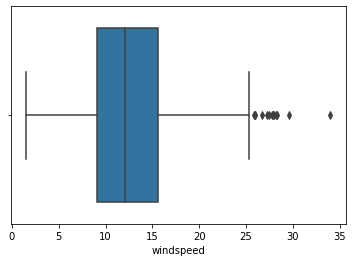

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


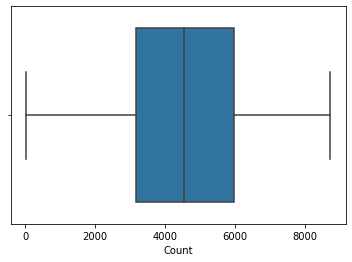

In [32]:
# Checking outliers
cols = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']
for i in cols:
    sns.boxplot(bike[i]); plt.show() 

In [33]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 43.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [34]:
cols1 = ['Humidity', 'windspeed']
# Outlier tretment
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method ='iqr', # choose IQR rule boundaries or gaussian for mean and std
                   tail = 'both', # cap left, right or both tails
                   fold = 1.5,
                  # variables = ['']
                  )

for i in cols1:
    bike[i] = winsor.fit_transform(bike[[i]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


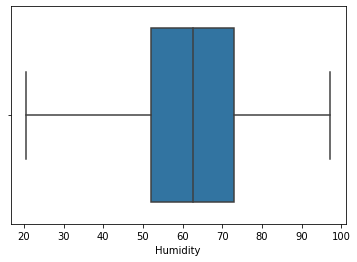

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


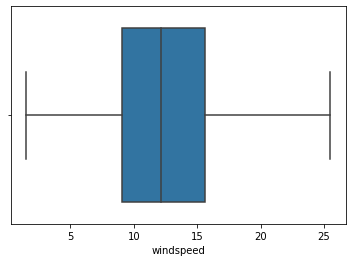

In [35]:
for i in cols1:
    sns.boxplot(bike[i]); plt.show() 

Outliers are removed.

In [36]:
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   Humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   Count                   730 non-null    int64  
 5   Season_spring           730 non-null    uint8  
 6   Season_summer           730 non-null    uint8  
 7   Season_winter           730 non-null    uint8  
 8   Year_2019               730 non-null    uint8  
 9   Month_Aug               730 non-null    uint8  
 10  Month_Dec               730 non-null    uint8  
 11  Month_Feb               730 non-null    uint8  
 12  Month_Jan               730 non-null    uint8  
 13  Month_July              730 non-null    uint8  
 14  Month_June              730 non-null    ui

In [37]:
bike.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


**Rescaling Numerical features.**

In [38]:
# importing MinMax scaler from preprocessing module of sklearn library
from sklearn.preprocessing import MinMaxScaler

# defining a variable scaler for minmax scaling
scaler = MinMaxScaler()

# Min_Max scaling on all the numericals variables and leaving Count variable aside
cols2 = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

bike[cols2] = scaler.fit_transform(bike[cols2])
bike[cols2].head()

,temp,atemp,Humidity,windspeed,Count
0,0.355170,0.373517,0.782800,0.385381,0.110792
1,0.379232,0.360541,0.639779,0.631295,0.089623
2,0.171000,0.144830,0.302494,0.630653,0.152669
3,0.175530,0.174649,0.502094,0.384963,0.177174
4,0.209120,0.197158,0.302082,0.459228,0.181546


In [39]:
bike.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,0.355170,0.373517,0.782800,0.385381,0.110792,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.379232,0.360541,0.639779,0.631295,0.089623,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,0.171000,0.144830,0.302494,0.630653,0.152669,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0.175530,0.174649,0.502094,0.384963,0.177174,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.209120,0.197158,0.302082,0.459228,0.181546,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [40]:
bike.shape

(730, 30)

In [41]:
bike.describe()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.543852,0.519090,0.550992,0.467493,0.516108,0.246575,0.252055,0.243836,0.500000,0.084932,...,0.028767,0.142466,0.142466,0.142466,0.142466,0.143836,0.143836,0.690411,0.634247,0.336986
std,0.228140,0.213968,0.184092,0.211304,0.222735,0.431313,0.434490,0.429689,0.500343,0.278971,...,0.167266,0.349767,0.349767,0.349767,0.349767,0.351164,0.351164,0.462641,0.481971,0.473004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346084,0.339611,0.410303,0.314209,0.362143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.548307,0.535942,0.548768,0.442689,0.520766,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.743261,0.695494,0.683839,0.588525,0.683847,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Correlation Matrix**

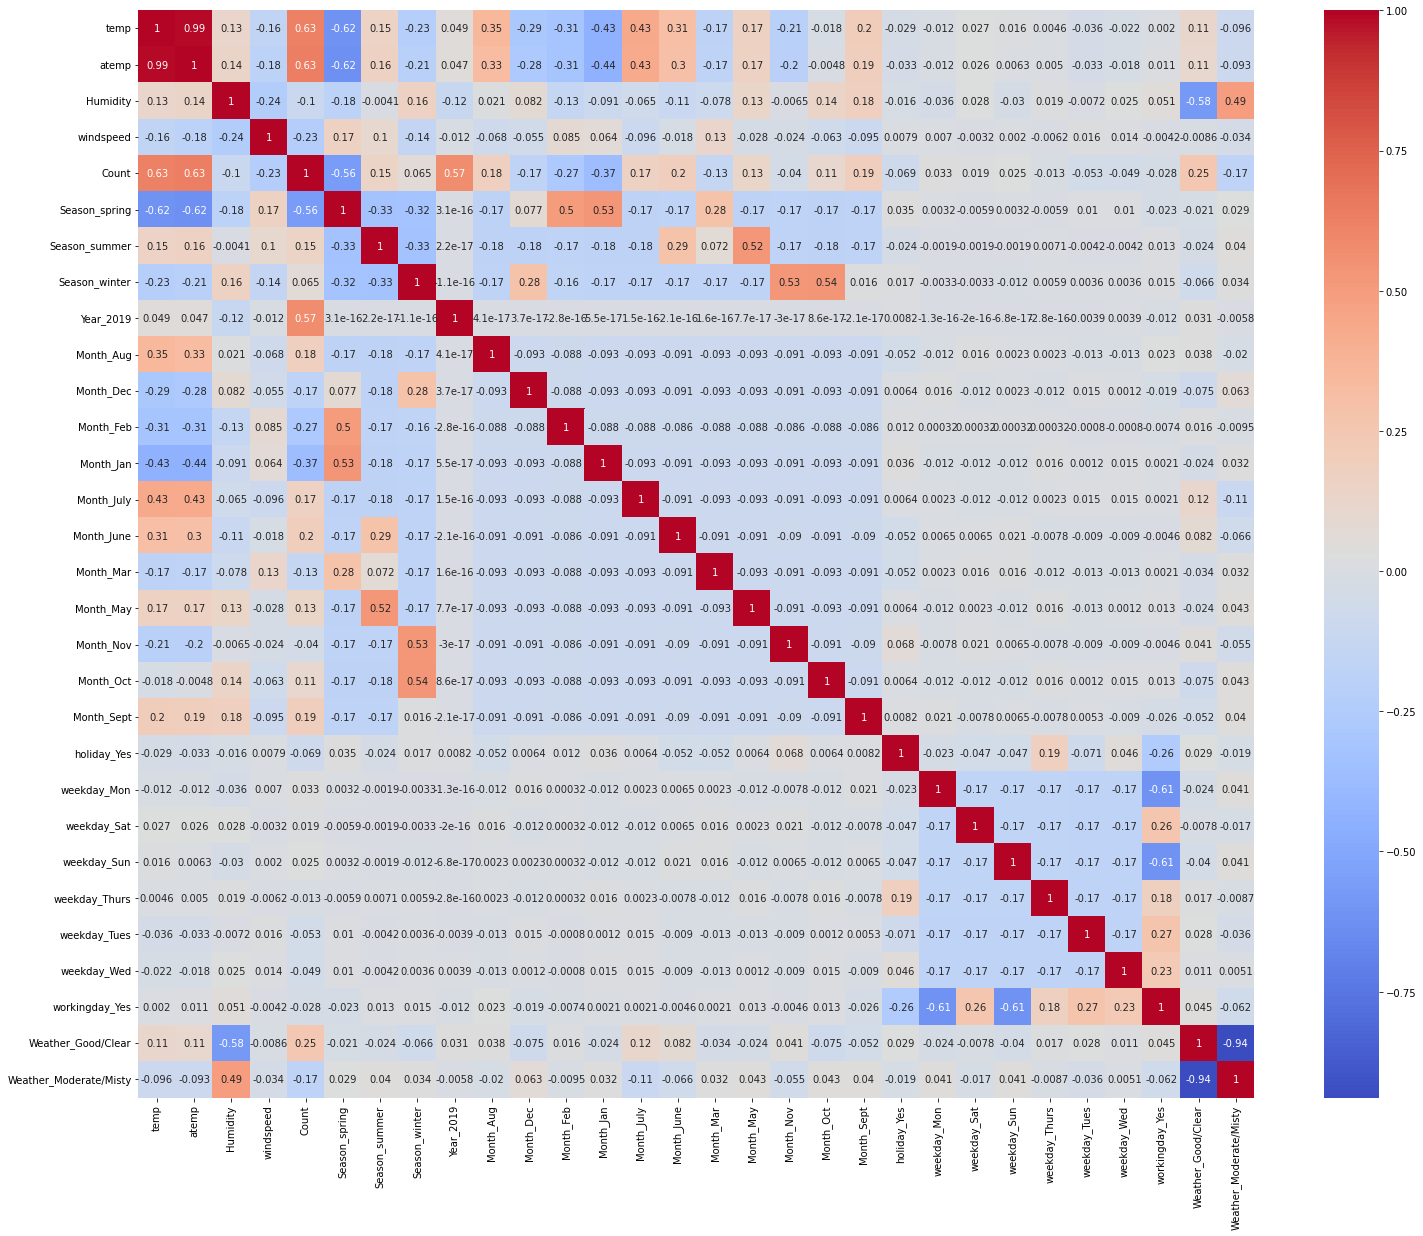

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap= 'coolwarm')
plt.show()

In [43]:
bike.columns

Index(['temp', 'atemp', 'Humidity', 'windspeed', 'Count', 'Season_spring',
       'Season_summer', 'Season_winter', 'Year_2019', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sept', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'workingday_Yes', 'Weather_Good/Clear',
       'Weather_Moderate/Misty'],
      dtype='object')

In [44]:
bike.rename(columns = {'Weather_Good/Clear':'Weather_Good_Clear', 'Weather_Moderate/Misty':'Weather_Moderate_Misty'}, inplace = True)

In [45]:
import statsmodels.formula.api as smf 
         
ml1 = smf.ols('Count ~ temp + atemp + Humidity + windspeed + Season_spring + Season_summer + Season_winter + Year_2019 + Month_Aug + Month_Dec + Month_Feb + Month_Jan + Month_July + Month_June+ Month_Mar + Month_May + Month_Nov + Month_Oct + Month_Sept + holiday_Yes + weekday_Mon + weekday_Sat + weekday_Sun + weekday_Thurs + weekday_Tues + weekday_Wed + workingday_Yes + Weather_Good_Clear + Weather_Moderate_Misty', data = bike).fit() # regression model

# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     134.1
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          2.17e-263
Time:                        10:18:35   Log-Likelihood:                 747.25
No. Observations:                 730   AIC:                            -1434.
Df Residuals:                     700   BIC:                            -1297.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1832      0.073      2.523      0.012       0.041       0.326
temp                       0.2544      0.130      1.961      0.050      -0.000       0.509
atemp                      0.1594      0.129      1.240      0.216      -0.093       0.412
Humidity                  -0.1361      0.026     -5.146      0.000      -0.188      -0.084
windspeed                 -0.1160      0.018     -6.592      0.000      -0.151      -0.081
Season_spring             -0.0954      0.025     -3.877      0.000      -0.144      -0.047
Season_summer              0.0055      0.021      0.259      0.795      -0.036       0.047
Season_winter              0.0855      0.022      3.868      0.000       0.042       0.129
Year_2019                  0.2324      0.007     34.457      0.000       0.219       0.246
Month_Aug               2.365e-05      0.028      0.001      0.999      -0.055       0.055
Month_Dec                 -0.0650      0.028     -2.322      0.021      -0.120      -0.010
Month_Feb                 -0.0382      0.028     -1.374      0.170      -0.093       0.016
Month_Jan                 -0.0562      0.029     -1.963      0.050      -0.112    1.33e-05
Month_July                -0.0469      0.029     -1.631      0.103      -0.103       0.010
Month_June                 0.0084      0.020      0.417      0.677      -0.031       0.048
Month_Mar                  0.0082      0.021      0.387      0.699      -0.034       0.050
Month_May                  0.0324      0.017      1.871      0.062      -0.002       0.066
Month_Nov                 -0.0665      0.030     -2.198      0.028      -0.126      -0.007
Month_Oct                  0.0065      0.030      0.219      0.827      -0.052       0.064
Month_Sept                 0.0629      0.026      2.392      0.017       0.011       0.114
holiday_Yes               -0.1065      0.053     -2.028      0.043      -0.210      -0.003
weekday_Mon               -0.0392      0.057     -0.683      0.495      -0.152       0.073
weekday_Sat               -0.0014      0.012     -0.117      0.907      -0.026       0.023
weekday_Sun               -0.0450      0.058     -0.779      0.436      -0.158       0.068
weekday_Thurs             -0.0177      0.013     -1.415      0.157      -0.042       0.007
weekday_Tues              -0.0301      0.012     -2.436      0.015      -0.054      -0.006
weekday_Wed               -0.0329      0.012     -2.654      0.008      -0.057      -0.009
workingday_Yes            -0.0459      0.057     -0.805      0.421      -0.158       0.066
Weather_Good_Clear         0.2213      0.023      9.627      0.000       0.176       0.266
Weather_Moderate_Misty     0.1694      0.021      7.922      0.000       0.127       0.211
==============================================================================
O

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = bike[list(bike.select_dtypes(include = ['int64', 'float64', 'uint8']).columns)]

# Profit feature is dependent or out put feature so we are deleting
X = X.drop('Count', axis = 1)

## VIF dataframe
vif_bike = pd.DataFrame()
vif_bike["feature"] = X.columns

## calculating VIF for each feature
vif_bike["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]
print(vif_bike)

                   feature         VIF
0                     temp  538.069916
1                    atemp  482.680682
2                 Humidity   20.693531
3                windspeed    7.235795
4            Season_spring   13.281708
5            Season_summer    9.576849
6            Season_winter   10.927596
7                Year_2019    2.092032
8                Month_Aug    5.946828
9                Month_Dec    5.641759
10               Month_Feb    5.150995
11               Month_Jan    5.997247
12              Month_July    6.196695
13              Month_June    3.075089
14               Month_Mar    3.407689
15               Month_May    2.362028
16               Month_Nov    6.550598
17               Month_Oct    6.446846
18              Month_Sept    4.903076
19             holiday_Yes    3.492603
20             weekday_Mon   15.999349
21             weekday_Sat    1.988970
22             weekday_Sun   16.178995
23           weekday_Thurs    2.037778
24            weekday_Tue

In [47]:
# Drop columns have high VIF>10 and high  p>0.05
bike.drop(["atemp", "Month_Aug", "Month_Mar", "Month_June", "Month_Oct", "weekday_Sat", "workingday_Yes", "weekday_Sun", "weekday_Mon"], axis = 1, inplace = True)

**This model seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).**

*  Intercept	 = 0.1832
*  temp       =	0.2544
*  Humidity   = 	-0.1361
*  windspeed	 = -0.1160
*  Season_spring =	-0.0954 
*  Season_summer = 	0.0055
*  Season_winter =	0.0855
*  Year_2019	= 0.2324
*  Month_Dec = 	-0.0650	
*  Month_Feb	= -0.0382	
*  Month_Jan= 	-0.0562	
*  Month_July=	-0.0469	
*  Month_May	= 0.0324
*  Month_Nov= 	-0.0665	
*  Month_Sept	= 0.0629	
*   holiday_Yes           =	-0.1065	
*  weekday_Thurs          =	-0.0177	
*  weekday_Tues         	= -0.0301	
*  weekday_Wed            =	-0.0329	
*  Weather_Good_Clear     =	0.2213	
*  Weather_Moderate_Misty =	0.1694	

**F Statistics** :

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 134.1

Prob (F-statistic): 2.17e-263

**The multi linear regression equation :**

Count =  0.1832 + (temp * 0.2544) - (Humidity * 0.1361) - (windspeed * 0.1160) - (Season_spring * 0.0954) + (Season_summer * 0.0055) +  (Season_winter * 0.0855) + (Year_2019 * 0.2324) - (Month_Dec * 0.0650) - (Month_Feb * 0.0382) - (Month_Jan * 0.0562) - (Month_July * 0.0469) +
(Month_May * 0.0324) - (Month_Nov * 0.0665) + (Month_Sept * 0.0629) -
(holiday_Yes * 0.1065) - (weekday_Thurs * 0.0177) - (weekday_Tues * 0.0301) - (weekday_Wed * 0.0329)+ (Weather_Good_Clear * 0.2213) +
(Weather_Moderate_Misty * 0.1694) 

# **Split the data into Train and Test**

In [48]:
# Split the data set into train(70% of the data) and test(30% of the data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bike.drop("Count", axis = 1), bike.Count, test_size = 0.3, random_state = 42)


In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(511, 20)
(511,)
(219, 20)
(219,)


#**Model Building**

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
rmse =lambda y, y_hat: np.sqrt(mean_squared_error(y, y_hat))

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred_test = lm.predict(x_test)

result_test = pd.DataFrame({'Actual':y_test, "Predicted": y_pred_test})
result_test.head(10)

,Actual,Predicted
468,0.855729,0.713657
148,0.548320,0.513527
302,0.380695,0.446491
355,0.350437,0.199780
515,0.841694,0.828576
266,0.621376,0.572535
72,0.232858,0.275355
81,0.241486,0.292367
133,0.389669,0.381342
342,0.413944,0.394341


In [52]:
## importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_test = r2_score(y_test, y_pred_test)

In [53]:
print('R2 score(test): ', score_test)
print('Mean squared error(test): ', mean_squared_error(y_test, y_pred_test))
print('Root Mean squared error(test): ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 score(test):  0.8436298219326539
Mean squared error(test):  0.007679872528861928
Root Mean squared error(test):  0.08763488191845716


In [54]:
y_pred_train = lm.predict(x_train)

result_train = pd.DataFrame({'Actual':y_train, "Predicted": y_pred_train})
result_train.head(10)

,Actual,Predicted
683,0.623907,0.565554
645,0.627704,0.567111
163,0.575012,0.497676
360,0.131155,0.109195
640,0.868615,0.813343
625,0.466061,0.631772
711,0.633916,0.629909
311,0.481247,0.445821
333,0.413139,0.362925
456,0.680396,0.622949


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


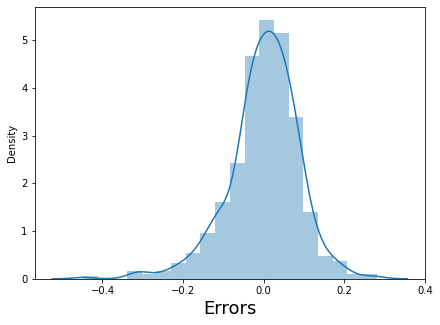

In [55]:
# residual calculations
res = y_train - y_pred_train

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Residuals are normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


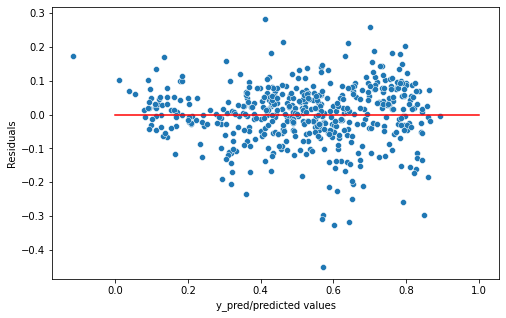

In [56]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_pred_train,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')


Residuals have equal or almost equal variance across the regression line.

In [57]:
score_train = r2_score(y_train, y_pred_train)

print('R2 score(train): ', score_train)
print('Mean squared error(train): ', mean_squared_error(y_train, y_pred_train))
print('Root Mean squared error(train): ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

R2 score(train):  0.8445364321968072
Mean squared error(train):  0.0077168699038897125
Root Mean squared error(train):  0.08784571648002942


Text(0.5, 0, 'y_test')

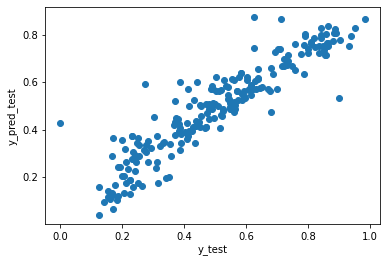

In [58]:
plt.scatter(y_test, y_pred_test)
plt.ylabel("y_pred_test")
plt.xlabel("y_test")

In [59]:
R2_test =  0.8436298219326539
# n is number of rows in X
n = x_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_R2_test = 1-(1-R2_test)*(n-1)/(n-p-1)
print('adjusted R2 score(test):', adjusted_R2_test)

adjusted R2 score(test): 0.8278348544511038


In [60]:
R2_train =  0.8445364321968072
# n is number of rows in X
n = x_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_R2_train = 1-(1-R2_train)*(n-1)/(n-p-1)
print('adjusted R2 score(train):', adjusted_R2_train)

adjusted R2 score(train): 0.828833041509616


# **Final Reuslt(MLR):**

* R2 score(test):  0.8437

* R2 score(train):  0.8445

* adjusted R2 score(test): 0.8278

* adjusted R2 score(train): 0.8288

Its right fit model.

#**AUTOML:  get the best model used as TPOT optimizer**

In [61]:
!pip install TPOT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.4 MB/s 
     |████████████████████████████████| 192.9 MB 59 kB/s 
     |████████████████████████████████| 160 kB 44.5 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=f4bbc2918db99115187ba59ec402da9c1d27f8da0bba87565095c9ee64470ab0
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [62]:
from sklearn.metrics import mean_squared_error, make_scorer
rmse =lambda y, y_hat: np.sqrt(mean_squared_error(y, y_hat))
from tpot import TPOTRegressor
rmse_scorer = make_scorer(rmse, greater_is_better = False)
pipeline_optimizer = TPOTRegressor(
    scoring = rmse_scorer,
    max_time_mins = 60,
    random_state = 42,
    verbosity = 2
    )
pipeline_optimizer.fit(x_train, y_train)

print(pipeline_optimizer.score(x_test, y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0820894126200388

Generation 2 - Current best internal CV score: -0.08181799746976842

Generation 3 - Current best internal CV score: -0.08181799746976842

Generation 4 - Current best internal CV score: -0.08122061799793996

Generation 5 - Current best internal CV score: -0.07978500925140376

Generation 6 - Current best internal CV score: -0.07942448551515312

Generation 7 - Current best internal CV score: -0.07914433136571199

Generation 8 - Current best internal CV score: -0.07874147489784822

Generation 9 - Current best internal CV score: -0.07807520817919364

Generation 10 - Current best internal CV score: -0.07807520817919364

Generation 11 - Current best internal CV score: -0.07751927136292877

Generation 12 - Current best internal CV score: -0.07751927136292877

Generation 13 - Current best internal CV score: -0.07751927136292877

Generation 14 - Current best internal CV score: -0.07751927136292877

Generation 15 - Current best 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"


In [63]:
pipeline_optimizer.fitted_pipeline_
pipeline_optimizer.export('bestmodel.py')

In [64]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RidgeCV()),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True, max_features=0.4, min_samples_leaf=4, min_samples_split=19, n_estimators=100)),
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.1, max_depth=7, min_child_weight=18, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.5, verbosity=0)),
    ElasticNetCV(l1_ratio=0.05, tol=0.0001)
)

In [65]:
exported_pipeline.fit(x_train, y_train)

y_pred_test = exported_pipeline.predict(x_test)

result_test = pd.DataFrame({'Actual':y_test, "Predicted": y_pred_test})
result_test.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"


,Actual,Predicted
468,0.855729,0.809359
148,0.548320,0.452012
302,0.380695,0.399947
355,0.350437,0.250838
515,0.841694,0.857760
266,0.621376,0.469379
72,0.232858,0.242917
81,0.241486,0.247094
133,0.389669,0.397637
342,0.413944,0.385377


In [66]:
## importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_test = r2_score(y_test, y_pred_test)

print('R2 score(test): ', score_test)
print('Mean squared error(test): ', mean_squared_error(y_test, y_pred_test))
print('Root Mean squared error(test): ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 score(test):  0.8974892138616818
Mean squared error(test):  0.005034654178347523
Root Mean squared error(test):  0.07095529704220484


In [68]:
y_pred_train = exported_pipeline.predict(x_train)

result_train = pd.DataFrame({'Actual':y_train, "Predicted": y_pred_train})
result_train.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"


,Actual,Predicted
683,0.623907,0.624193
645,0.627704,0.566321
163,0.575012,0.534128
360,0.131155,0.166433
640,0.868615,0.811900
625,0.466061,0.520351
711,0.633916,0.603058
311,0.481247,0.449627
333,0.413139,0.411512
456,0.680396,0.663446


In [69]:
score_train = r2_score(y_train, y_pred_train)

print('R2 score(train): ', score_train)
print('Mean squared error(train): ', mean_squared_error(y_train, y_pred_train))
print('Root Mean squared error(train): ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

R2 score(train):  0.9538559140233092
Mean squared error(train):  0.002290491034959459
Root Mean squared error(train):  0.0478590747399013


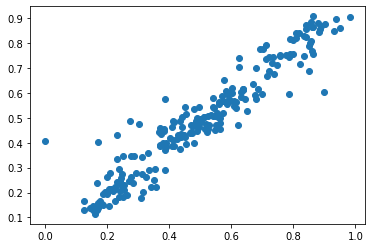

In [70]:
plt.scatter(y_test, y_pred_test)

#**Final Reuslt(AUTOML):**

R2 score(test): 0.8974

R2 score(train): 0.9538

Its  a slighly over fit model.

# **Report:**

As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.2544’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.2544 units.

Year - A coefficient value of ‘0.2324’ indicated that a unit increase in year variable increases the bike hire numbers by 0.2324 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking.

Weather Situation (Good/Clear) - A coefficient value of ‘0.2213’ indicated that, w.r.t Weather, a unit increase in Weather variable increases the bike hire numbers by 0.2213 units.